In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df_desc_null_actions = pd.read_csv("df_null_action.csv", nrows=30000)
df_desc_null_actions['2']

0        NOTICE:  Citation on Petition for Formal Adjud...
1                        Citation Filed; Served as Ordered
2        An Interested Person,Johanna Soris, Asst. Atto...
3         Letters of Authority for Personal Representative
4        NOTICE:  Citation on Petition for Formal Adjud...
                               ...                        
29995                     Answer of Arthur Joseph Gear\n\n
29996                                   Findings and Order
29997    Judgment issued\nFinal Judgment\t\t\tFinding\n...
29998    8/31/10 Affidavit of SERVICE FOR D01  SHIRLEY ...
29999    Attorney Daniels, Jr., Esq., Richard S dismiss...
Name: 2, Length: 30000, dtype: object

In [28]:
# Vectorize the descriptions.
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,3))

# features = tfidf.fit_transform(dataset['0'].astype('U'))
description_mia_vectorized = tfidf.fit_transform(df_desc_null_actions['2'].astype('U'))

In [29]:
description_mia_vectorized

<30000x18366 sparse matrix of type '<class 'numpy.float64'>'
	with 771896 stored elements in Compressed Sparse Row format>

In [30]:
# Create a kmeans model on our data, using k clusters. Compile a list of SSEs for each k.

k_list = []
SSE_list = []

number_clusters = range(1,100)

for i in number_clusters:
    kmeans_model = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
                         n_clusters=i, n_init=10, random_state=None, tol=0.0001, verbose=0).fit(description_mia_vectorized)
    SSE = kmeans_model.inertia_
    SSE_list.append(SSE)
    k_list.append(i)

In [26]:
print(k_list)

[30, 35, 40, 45, 50, 55]


Text(0, 0.5, '$SSE$')

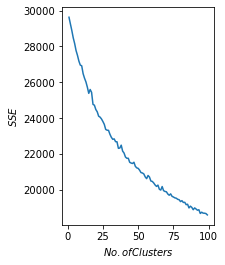

In [31]:
# Plot the results
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(k_list, SSE_list)
ax1.set_xlabel('$No. of Clusters$')
ax1.set_ylabel('$SSE$')